# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 255)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('use_inf_as_na', True)
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
pd.options.display.max_seq_items = 3000

# Datu ielāde un kopu izveide

## Datu ielāde
Label definīcija - cenas izmaiņas vai ilgu laiku bijusi standartcena

In [9]:
#datu ielāde
df_valodas=pd.read_csv(r'\Dati_mag_darbam\Valodas_2020.csv')

In [10]:
#datu piemērs
df_valodas.head()

,idd_wh_service,en,lv,ru
0,DTVS0000019,0.008532,0.980024,0.011445
1,DTVS0000032,0.080132,0.009511,0.910357
2,DTVS0000052,0.000049,0.913947,0.086004
3,DTVS0000055,0.127766,0.737593,0.134641
4,DTVS0000059,0.090698,0.012768,0.896534


## K means

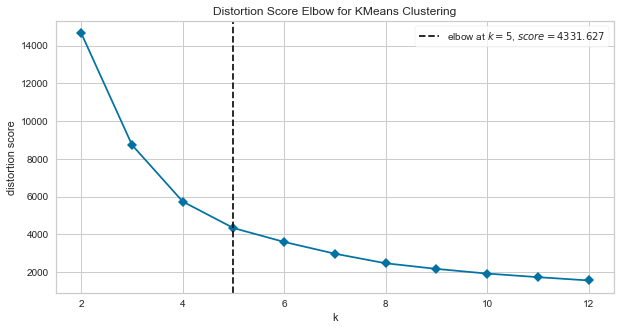

In [3]:
#klasteru skaitu matemātiski nosaka ar t.s. elkoņa metodi, resp, tur, kur grafikam visasākais
#locījums jeb straujākā kļūdas funkcijas vērtības samazināšanās (KNN jo vairāk klasteru, jo mazāka kļūda)
model = KMeans()

f = plt.figure(figsize=(10, 5))
visualizer = KElbowVisualizer(model, k=(2,13), timings = False)
visualizer.fit(df_valodas.drop(columns=('idd_wh_service')))    
visualizer.show()

3    59798
0    39907
1    33591
4    26031
2    12061
Name: cluster, dtype: int64

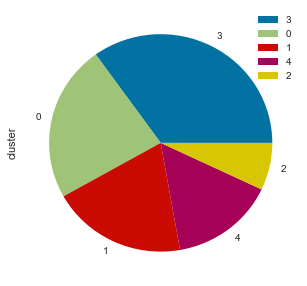

In [4]:
#atbilstošākais klasteru skaits = 5, nosakām, kuram klasterim pieder katrs lietotājs
n_clusters = 5

means_cluster = KMeans(n_clusters=n_clusters, random_state=111)
columns = list(df_valodas.drop(columns=('idd_wh_service')).columns)
est = means_cluster.fit(df_valodas[columns])
clusters = est.labels_
df_valodas['cluster'] = clusters
plot = df_valodas['cluster'].value_counts().to_frame().plot.pie(y='cluster', figsize=(5, 5))
df_valodas['cluster'].value_counts()

In [6]:
# izdrukājam vidējās vērtības
round(df_valodas.groupby('cluster').mean(),2)

,en,lv,ru
cluster,,,
0,0.13,0.67,0.20
1,0.07,0.06,0.87
2,0.58,0.22,0.20
3,0.04,0.92,0.04
4,0.09,0.40,0.51
